# Tuan Nguyen, Utica College MSDS, Fall 2021 DSC 680 Capstone

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data 

labels = pd.DataFrame(np.load('C:/Users/cg/Documents/labels.npy', mmap_mode=None, allow_pickle=False))
inputs = pd.DataFrame(np.load('C:/Users/cg/Documents/inputs.npy', mmap_mode=None, allow_pickle=False))
iq = pd.DataFrame(np.load('C:/Users/cg/Documents/iq.npy', mmap_mode=None, allow_pickle=True))

In [3]:
labels.head()

,0
0,"('amdsb', 'AM radio', -10, 0)"
1,"('amdsb', 'AM radio', -10, 1)"
2,"('amdsb', 'AM radio', -10, 10)"
3,"('amdsb', 'AM radio', -10, 100)"
4,"('amdsb', 'AM radio', -10, 101)"


## 
# Data Wrangling & Exploratory Data Analysis

In [4]:
print('labels data type:', type(labels))
print('labels shape:', np.shape(labels), '\n')

print('iq data type:', type(iq))
print('iq shape:', np.shape(iq))

labels data type: <class 'pandas.core.frame.DataFrame'>
labels shape: (125361, 1) 

iq data type: <class 'pandas.core.frame.DataFrame'>
iq shape: (125361, 3)


In [5]:
# Create a dataframe where the labels are split into four seperate columns. Remove any unnecessary characters.

labels_df = labels[0].str.split(',', expand=True)
labels_df[0] = labels_df[0].str.replace('(','')
labels_df[0] = labels_df[0].str.replace('(','')
labels_df[0] = labels_df[0].str.replace("'",'')
labels_df[1] = labels_df[1].str.replace("'",'')
labels_df[3] = labels_df[3].str.replace(')','')


# Create a column in the dataframe that contains the original label
labels_df['original'] = labels

# Rename the columns so it's clear
labels_df = labels_df.rename(columns={0: 'modulation_class', 
                                      1: 'signal_class',
                                      2: 'snr',
                                      3: 'sample_number'})

In [6]:
labels_df.head(3)

,modulation_class,signal_class,snr,sample_number,original
0,amdsb,AM radio,-10,0,"('amdsb', 'AM radio', -10, 0)"
1,amdsb,AM radio,-10,1,"('amdsb', 'AM radio', -10, 1)"
2,amdsb,AM radio,-10,10,"('amdsb', 'AM radio', -10, 10)"


In [7]:
# Create a data frame containing the full IQ signal, the I/Q components split into its respective columns, and each 256 values in its own column. Who knows what you'll need....

iq_df = iq

# Rearrange iq data columns so full IQ sample is first, followed by I, then Q
iq_df = iq_df[[2,0,1]]

iq_df = iq_df.rename(columns={2: 'iq_sig', 
                              0: 'i_comp',
                              1: 'q_comp'})

# Combine iq df with inputs df
iq_df = pd.concat([iq_df.reset_index(drop=True), inputs.reset_index(drop=True)], axis=1)

In [8]:
# Create a combined data frame.
rfdf = pd.concat([labels_df.reset_index(drop=True), iq_df.reset_index(drop=True)], axis=1)

print('inputs data type:', type(rfdf))
print('inputs shape:', np.shape(rfdf))

inputs data type: <class 'pandas.core.frame.DataFrame'>
inputs shape: (125361, 264)


In [9]:
# Check data types

print('modulation_class is type:', type(rfdf['modulation_class'][0]))
print('signal_class is type:', type(rfdf['signal_class'][0]))
print('snr is type:', type(rfdf['snr'][0]))
print('sample_number is type:', type(rfdf['sample_number'][0]))
print('original is type:', type(rfdf['original'][0]))
print('iq_sig is type:', type(rfdf['iq_sig'][0]))
print('i_comp is type:', type(rfdf['i_comp'][0]))
print('q_comp is type:', type(rfdf['q_comp'][0]))
print('iq values are type:', type(rfdf[0][0]))

modulation_class is type: <class 'str'>
signal_class is type: <class 'str'>
snr is type: <class 'str'>
sample_number is type: <class 'str'>
original is type: <class 'str'>
iq_sig is type: <class 'numpy.ndarray'>
i_comp is type: <class 'numpy.ndarray'>
q_comp is type: <class 'numpy.ndarray'>
iq values are type: <class 'numpy.float32'>


In [10]:
# Convert data types where necessary

rfdf['snr'] = rfdf['snr'].astype('int')
rfdf['sample_number'] = rfdf['sample_number'].astype('int')

In [11]:
# Check data types again to confirm type has been updated

print('snr is type:', type(rfdf['snr'][0]))
print('sample_number is type:', type(rfdf['sample_number'][0]))

snr is type: <class 'numpy.int32'>
sample_number is type: <class 'numpy.int32'>


In [12]:
# Generate basic statistics for categorical variables

rfdf[['modulation_class', 'signal_class']].describe()

,modulation_class,signal_class
count,125361,125361
unique,6,8
top,pulsed,AM radio
freq,56000,28000


In [13]:
# Identify unique values in the modulation_class column

rfdf['modulation_class'].unique()

array(['amdsb', 'amssb', 'ask', 'bpsk', 'fmcw', 'pulsed'], dtype=object)

In [14]:
# Identify unique values in the signal_class column

rfdf['signal_class'].unique()

array([' AM radio', ' short-range', ' Satcom', ' Radar-Altimeter',
       ' Air-Ground-MTI', ' Airborne-detection', ' Airborne-range',
       ' Ground mapping'], dtype=object)

In [15]:
# Generate basic statistics for continuous variables

rfdf[['snr', 'sample_number']].describe()

,snr,sample_number
count,125361.000000,125361.000000
mean,-0.999146,349.394923
std,11.532295,202.112372
min,-20.000000,0.000000
25%,-12.000000,174.000000
50%,0.000000,349.000000
75%,10.000000,525.000000
max,18.000000,699.000000


In [16]:
# Create a pivot table

rfdf2 = rfdf.copy()
rfdf2['count'] = 1

pivot = pd.pivot_table(rfdf2, values = 'count', index=['modulation_class', 'signal_class'], aggfunc=np.sum)
pivot

count
modulation_class signal_class              
amdsb             AM radio            14000
amssb             AM radio            14000
ask               short-range         14000
bpsk              Satcom              13361
fmcw              Radar-Altimeter     14000
pulsed            Air-Ground-MTI      14000
                  Airborne-detection  14000
                  Airborne-range      14000
                  Ground mapping      14000

# 
# Machine Learning

In [17]:
cnn_df = pd.DataFrame(np.load('C:/Users/cg/Documents/cnndf.npy', mmap_mode=None, allow_pickle=True))
cnn_df = cnn_df.rename(columns={0: 'modulation_class', 1: 'signal_class', 2: 'snr', 3: 'iq_sig'})

In [18]:
cnn_df.head(5)

,modulation_class,signal_class,snr,iq_sig
0,amdsb,AM radio,-10,"[[0.0022213736, -0.004062688, 0.00049394136, -..."
1,amdsb,AM radio,-10,"[[0.008891443, 0.0048659234, 0.014986212, 0.00..."
2,amdsb,AM radio,-10,"[[0.006300397, 0.0017758766, -0.010450985, -0...."
3,amdsb,AM radio,-10,"[[-0.000121575635, 0.0054833353, -0.0015846576..."
4,amdsb,AM radio,-10,"[[-0.0027291004, -0.00032252073, 0.0072389836,..."


## 
# CNN Preprocessing

In [19]:
from keras import callbacks
from keras import layers
from keras import models
from keras import Input
from keras.models import Model

In [20]:
# Preprocessing - Select Subsample of Data

# cnn_df = cnn_df[cnn_df.snr >= 0]

In [21]:
# Preprocessing - Create Train & Test Sets

import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, sig_train, sig_test, mod_train, mod_test= train_test_split(cnn_df['iq_sig'],
                                                                            cnn_df['signal_class'], 
                                                                            cnn_df['modulation_class'],
                                                                            train_size = .80, 
                                                                            random_state = 2850)

In [22]:
# Preprocessing - Encoding

mod_train = pd.get_dummies(mod_train)
mod_test = pd.get_dummies(mod_test)

sig_train = pd.get_dummies(sig_train)
sig_test = pd.get_dummies(sig_test)

In [23]:
# Preprocessing - Padding

from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, dtype='float32', maxlen=16)
x_test = sequence.pad_sequences(x_test, dtype='float32', maxlen=16)

In [24]:
# Preprocessing - Reshape

N, H, W = x_train.shape
N_test = x_test.shape[0]
C = 1

x_train = x_train.reshape(N, H, W, C)
x_test = x_test.reshape(N_test, H, W, C)

## 
# Single Task CNN - Modulation Classification

In [25]:
# Create Convolutional Neural Network for Modulation Classification

mod_classification_cnn = models.Sequential()

mod_classification_cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:])) 
mod_classification_cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
mod_classification_cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
mod_classification_cnn.add(layers.Flatten())
mod_classification_cnn.add(layers.Dense(64, activation = 'relu'))
mod_classification_cnn.add(layers.Dense(6, activation = 'softmax'))

mod_classification_cnn.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

mod_cnn = mod_classification_cnn.fit(x_train,  mod_train, epochs = 10,  batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 33s 12ms/step - loss: 0.9352 - accuracy: 0.6760 - val_loss: 0.7337 - val_accuracy: 0.7592
Epoch 2/10
2821/2821 [==============================] - 36s 13ms/step - loss: 0.7239 - accuracy: 0.7572 - val_loss: 0.6919 - val_accuracy: 0.7683
Epoch 3/10
2821/2821 [==============================] - 39s 14ms/step - loss: 0.6981 - accuracy: 0.7656 - val_loss: 0.6786 - val_accuracy: 0.7766
Epoch 4/10
2821/2821 [==============================] - 34s 12ms/step - loss: 0.6728 - accuracy: 0.7742 - val_loss: 0.6570 - val_accuracy: 0.7851
Epoch 5/10
2821/2821 [==============================] - 32s 11ms/step - loss: 0.6556 - accuracy: 0.7795 - val_loss: 0.6630 - val_accuracy: 0.7842
Epoch 6/10
2821/2821 [==============================] - 32s 11ms/step - loss: 0.6429 - accuracy: 0.7826 - val_loss: 0.6496 - val_accuracy: 0.7880
Epoch 7/10
2821/2821 [==============================] - 31s 11ms/step - loss: 0.6260 - accuracy: 0.7879 - val_loss: 0.6533 -

In [26]:
# mod_classification_cnn.output_shape # Model Output Shape
# mod_classification_cnn.get_config() # Model Configuration
# mod_classification_cnn.get_weights() # Model Weights
# mod_classification_cnn.predict(x_test, batch_size=32) # Model Prediction
# mod_classification_cnn.predict_classes(x_test, batch_size=32) # Model Class Prediction
mod_classification_cnn.evaluate(x_test, mod_test, batch_size = 32) # Model Evaluation

784/784 [==============================] - 3s 4ms/step - loss: 0.6621 - accuracy: 0.7826


[0.6620702743530273, 0.7825549244880676]

## 
# Single Task CNN - Signal Classification

In [27]:
# Create Convolutional Neural Network for Signal Classification

sig_classification_cnn = models.Sequential()

sig_classification_cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:])) 
sig_classification_cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
sig_classification_cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',  padding = 'same'))
sig_classification_cnn.add(layers.Flatten())
sig_classification_cnn.add(layers.Dense(64, activation = 'relu'))
sig_classification_cnn.add(layers.Dense(8, activation = 'softmax'))

sig_classification_cnn.compile(optimizer = 'nadam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

sig_cnn = sig_classification_cnn.fit(x_train, sig_train, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 40s 14ms/step - loss: 1.1171 - accuracy: 0.5808 - val_loss: 1.0093 - val_accuracy: 0.6159
Epoch 2/10
2821/2821 [==============================] - 40s 14ms/step - loss: 0.9665 - accuracy: 0.6330 - val_loss: 0.9624 - val_accuracy: 0.6354
Epoch 3/10
2821/2821 [==============================] - 36s 13ms/step - loss: 0.9335 - accuracy: 0.6446 - val_loss: 0.9319 - val_accuracy: 0.6422
Epoch 4/10
2821/2821 [==============================] - 37s 13ms/step - loss: 0.9091 - accuracy: 0.6539 - val_loss: 0.9263 - val_accuracy: 0.6438
Epoch 5/10
2821/2821 [==============================] - 39s 14ms/step - loss: 0.8908 - accuracy: 0.6614 - val_loss: 0.9142 - val_accuracy: 0.6523
Epoch 6/10
2821/2821 [==============================] - 39s 14ms/step - loss: 0.8720 - accuracy: 0.6701 - val_loss: 0.9166 - val_accuracy: 0.6531
Epoch 7/10
2821/2821 [==============================] - 40s 14ms/step - loss: 0.8519 - accuracy: 0.6788 - val_loss: 0.9174 -

In [28]:
# sig_classification_cnn.output_shape # Model Output Shape
# sig_classification_cnn.get_config() # Model Configuration
# sig_classification_cnn.get_weights() # Model Weights
# sig_classification_cnn.predict(x_test, batch_size=32) # Model Prediction
# sig_classification_cnn.predict_classes(x_test, batch_size=32) # Model Class Prediction
sig_classification_cnn.evaluate(x_test, sig_test, batch_size = 32) # Model Evaluation

784/784 [==============================] - 4s 4ms/step - loss: 0.9506 - accuracy: 0.6472


[0.950608491897583, 0.6472300887107849]

# 
# Multi Task CNN - Modulation & Signal Classification

In [29]:
#32-32-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(32, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(32, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl1 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 20s 7ms/step - loss: 1.1043 - mod_class_loss: 0.8802 - sig_class_loss: 1.1604 - mod_class_accuracy: 0.7033 - sig_class_accuracy: 0.5654 - val_loss: 0.9552 - val_mod_class_loss: 0.7320 - val_sig_class_loss: 1.0110 - val_mod_class_accuracy: 0.7644 - val_sig_class_accuracy: 0.6185
Epoch 2/10
2821/2821 [==============================] - 18s 6ms/step - loss: 0.9377 - mod_class_loss: 0.7280 - sig_class_loss: 0.9902 - mod_class_accuracy: 0.7566 - sig_class_accuracy: 0.6233 - val_loss: 0.9303 - val_mod_class_loss: 0.7106 - val_sig_class_loss: 0.9852 - val_mod_class_accuracy: 0.7660 - val_sig_class_accuracy: 0.6215
Epoch 3/10
2821/2821 [==============================] - 18s 6ms/step - loss: 0.9128 - mod_class_loss: 0.7056 - sig_class_loss: 0.9646 - mod_class_accuracy: 0.7632 - sig_class_accuracy: 0.6305 - val_loss: 0.9127 - val_mod_class_loss: 0.6897 - val_sig_class_loss: 0.9684 - val_mod_class_accuracy: 0.7708 - val_sig_class_accuracy: 0.

In [30]:
#32-64-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(64, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(64, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl2 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 35s 12ms/step - loss: 1.0734 - mod_class_loss: 0.8384 - sig_class_loss: 1.1322 - mod_class_accuracy: 0.7172 - sig_class_accuracy: 0.5759 - val_loss: 1.1021 - val_mod_class_loss: 0.8517 - val_sig_class_loss: 1.1647 - val_mod_class_accuracy: 0.6763 - val_sig_class_accuracy: 0.5874
Epoch 2/10
2821/2821 [==============================] - 35s 12ms/step - loss: 0.9275 - mod_class_loss: 0.7122 - sig_class_loss: 0.9813 - mod_class_accuracy: 0.7620 - sig_class_accuracy: 0.6250 - val_loss: 0.9138 - val_mod_class_loss: 0.6918 - val_sig_class_loss: 0.9693 - val_mod_class_accuracy: 0.7736 - val_sig_class_accuracy: 0.6330
Epoch 3/10
2821/2821 [==============================] - 36s 13ms/step - loss: 0.8995 - mod_class_loss: 0.6860 - sig_class_loss: 0.9529 - mod_class_accuracy: 0.7707 - sig_class_accuracy: 0.6371 - val_loss: 0.8925 - val_mod_class_loss: 0.6693 - val_sig_class_loss: 0.9483 - val_mod_class_accuracy: 0.7800 - val_sig_class_accuracy:

In [31]:
#32-128-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(128, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(128, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl3 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 56s 20ms/step - loss: 1.0600 - mod_class_loss: 0.8320 - sig_class_loss: 1.1170 - mod_class_accuracy: 0.7183 - sig_class_accuracy: 0.5813 - val_loss: 0.9465 - val_mod_class_loss: 0.7165 - val_sig_class_loss: 1.0040 - val_mod_class_accuracy: 0.7648 - val_sig_class_accuracy: 0.6197
Epoch 2/10
2821/2821 [==============================] - 55s 20ms/step - loss: 0.9175 - mod_class_loss: 0.7042 - sig_class_loss: 0.9709 - mod_class_accuracy: 0.7644 - sig_class_accuracy: 0.6299 - val_loss: 0.9067 - val_mod_class_loss: 0.6877 - val_sig_class_loss: 0.9615 - val_mod_class_accuracy: 0.7723 - val_sig_class_accuracy: 0.6374
Epoch 3/10
2821/2821 [==============================] - 54s 19ms/step - loss: 0.8889 - mod_class_loss: 0.6795 - sig_class_loss: 0.9413 - mod_class_accuracy: 0.7717 - sig_class_accuracy: 0.6416 - val_loss: 0.8905 - val_mod_class_loss: 0.6680 - val_sig_class_loss: 0.9462 - val_mod_class_accuracy: 0.7844 - val_sig_class_accuracy:

In [32]:
#32-256-256

iq_input = Input(shape=(16,16,1), dtype='float32', name = 'x_train')

shared = layers.Conv2D(32, (4,4), activation = 'relu')(iq_input)
shared = layers.MaxPooling2D(2,2)(shared)

mod_predict = layers.Conv2D(256, (3,3), activation = 'relu')(shared)
mod_predict = layers.Flatten()(mod_predict)
mod_predict = layers.Dense(256, activation = 'relu')(mod_predict)
mod_predict = layers.Dense(6, activation = 'softmax', name = 'mod_class')(mod_predict)

sig_predict = layers.Conv2D(256, (3,3), activation = 'relu')(shared)
sig_predict = layers.Flatten()(sig_predict)
sig_predict = layers.Dense(256, activation = 'relu')(sig_predict)
sig_predict = layers.Dense(8, activation = 'softmax', name = 'sig_class')(sig_predict)

mtl_cnn = Model(iq_input, [mod_predict, sig_predict])

mtl_cnn.compile(optimizer = 'nadam',  loss = ['categorical_crossentropy', 'categorical_crossentropy'], metrics = ['accuracy'], loss_weights = [.2, .8])

mtl4 = mtl_cnn.fit(x_train, {'mod_class': mod_train, 'sig_class': sig_train}, epochs = 10, batch_size = 32, validation_split = .1)

Epoch 1/10
2821/2821 [==============================] - 101s 36ms/step - loss: 1.0349 - mod_class_loss: 0.8095 - sig_class_loss: 1.0913 - mod_class_accuracy: 0.7275 - sig_class_accuracy: 0.5886 - val_loss: 0.9229 - val_mod_class_loss: 0.7000 - val_sig_class_loss: 0.9786 - val_mod_class_accuracy: 0.7740 - val_sig_class_accuracy: 0.6287
Epoch 2/10
2821/2821 [==============================] - 104s 37ms/step - loss: 0.9027 - mod_class_loss: 0.6904 - sig_class_loss: 0.9557 - mod_class_accuracy: 0.7689 - sig_class_accuracy: 0.6365 - val_loss: 0.8946 - val_mod_class_loss: 0.6694 - val_sig_class_loss: 0.9509 - val_mod_class_accuracy: 0.7804 - val_sig_class_accuracy: 0.6397
Epoch 3/10
2821/2821 [==============================] - 98s 35ms/step - loss: 0.8752 - mod_class_loss: 0.6655 - sig_class_loss: 0.9276 - mod_class_accuracy: 0.7770 - sig_class_accuracy: 0.6461 - val_loss: 0.9199 - val_mod_class_loss: 0.6923 - val_sig_class_loss: 0.9767 - val_mod_class_accuracy: 0.7684 - val_sig_class_accurac

# 
# Visualizations

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn

from matplotlib.pyplot import figure

### STL Modulation Classification Accuracy

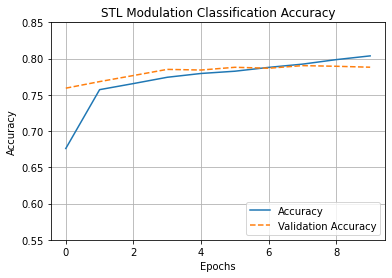

In [59]:
# Plot STL Modulation Classification Accuracy

plt.plot(mod_cnn.history['accuracy'])
plt.plot(mod_cnn.history['val_accuracy'], '--')

plt.title('STL Modulation Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### STL Signal Classification Accuracy

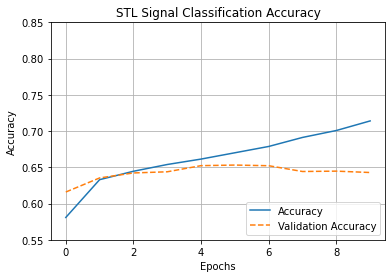

In [58]:
# Plot STL Signal Classification Accuracy

plt.plot(sig_cnn.history['accuracy'])
plt.plot(sig_cnn.history['val_accuracy'], '--')

plt.title('STL Signal Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### MTL Modulation Classification Accuracy

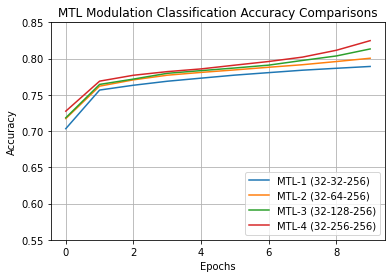

In [53]:
# Plot MTL Modulation Classification Accuracy

plt.plot(mtl1.history['mod_class_accuracy'])
plt.plot(mtl2.history['mod_class_accuracy'])
plt.plot(mtl3.history['mod_class_accuracy'])
plt.plot(mtl4.history['mod_class_accuracy'])

plt.title('MTL Modulation Classification Accuracy Comparisons')

plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='lower right')
 

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.grid()

plt.show()


### MTL Signal Classification Accuracy

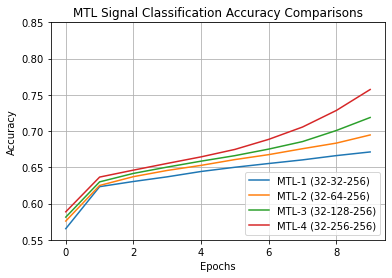

In [52]:
# Plot MTL Signal Classification Accuracy

plt.plot(mtl1.history['sig_class_accuracy'])
plt.plot(mtl2.history['sig_class_accuracy'])
plt.plot(mtl3.history['sig_class_accuracy'])
plt.plot(mtl4.history['sig_class_accuracy'])


plt.title('MTL Signal Classification Accuracy Comparisons')

plt.legend(['MTL-1 (32-32-256)', 
            'MTL-2 (32-64-256)', 
            'MTL-3 (32-128-256)',
            'MTL-4 (32-256-256)'], loc='lower right')
 
y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.grid()

plt.show()


### MTL-4 Modulation Classification Accuracy

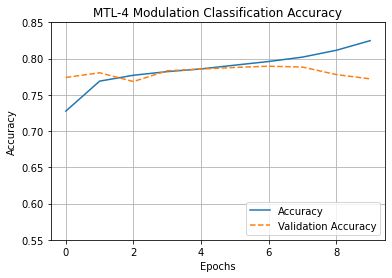

In [57]:
# Plot MTL4 Modulation Classification Accuracy

plt.plot(mtl4.history['mod_class_accuracy'])
plt.plot(mtl4.history['val_mod_class_accuracy'], '--')

plt.title('MTL-4 Modulation Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### MTL-4 Signal Classification Accuracy

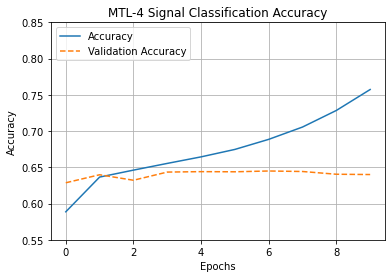

In [56]:
# Plot MTL4 Signal Classification Accuracy

plt.plot(mtl4.history['sig_class_accuracy'])
plt.plot(mtl4.history['val_sig_class_accuracy'], '--')

plt.title('MTL-4 Signal Classification Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

y_ticks = np.arange(.55, .90, .05)
plt.yticks(y_ticks)

plt.grid()

plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

### MTL-4 SNR Ranges

In [ ]:
# Plot MTL Model 4 Accuracy Across Various SNR Ranges

mtl_snr = pd.DataFrame(pd.read_csv('C:/Users/cg/Desktop/mtl_snr4.csv'))

plt.plot(mtl_snr['mod_class_accuracy'], 'o')
plt.plot(mtl_snr['sig_class_accuracy'], 'o')

plt.title('MTL-4 Classification Accuracy Across Various SNR Ranges')

plt.ylabel('Accuracy')
plt.xlabel('SNR Range')

plt.grid()

plt.xticks(range(len(mtl_snr)), mtl_snr['snr'])
plt.xticks(rotation=45)

#y_ticks = np.arange(0, 1, .1)
#plt.yticks(y_ticks)

plt.legend(['Modulation Classification',
            'Signal Classification'], loc='lower right')

plt.show()

### STL Modulation Classification Loss

### STL Signal Classification Loss

### MTL Modulation Classification Loss

### MTL Signal Classification Loss

### MTL-4 Modulation Classification Loss

### MTL-4 Signal Classification Loss

# STOP